In [2]:
#Step 1: Import Required Libraries.
import piplite
await piplite.install('seaborn')

#Data Analysis and Visualization Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Machine Learning Libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Jupyter Notebook Command
%matplotlib inline

<ipython-input-2-f19dacc85575>:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
#Step 2: Loading Dataset from CSV into a DataFrame and display the first 5 rows
df=pd.read_csv("kc_house_data_NaN.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,NaN,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,0.0,7129300520,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,1.0,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,-122.319,1690,7639
3,2.0,5631500400,20150225T000000,180000.0,2.0,1.0,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.23299999999999,2720,8062
4,3.0,2487200875,20141209T000000,604000.0,4.0,3.0,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.39299999999999,1360,5000


In [5]:
#***Data Wrangling******
#Step 3: Importing Dataset with Assigned Column Names
column_names = ["id", "date", "price", "bedrooms", "bathrooms", "sqft_living",
                "sqft_lot", "floors", "waterfront", "view", "condition", "grade",
                "sqft_above", "sqft_basement", "yr_built", "yr_renovated", 
                "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"]

df = pd.read_csv("kc_house_data_NaN.csv", names=column_names, header=0)
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
#Step 4:Checking Data Types of Each Column in the DataFrame
df.dtypes

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
#Step 5: statistical summary of the dataframe.
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#Step 6:Displaying All Column Names in the DataFrame
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
#Step 7:Removing Unwanted Columns and Viewing Updated Statistical Summary"
df.drop(["id" ], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
#Step 8:Checking Missing Values in Bedrooms and Bathrooms Columns
print("Number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("Number of Nan values for the column bathrooms :", df['bathrooms'].isnull().sum())

Number of NaN values for the column bedrooms : 13
Number of Nan values for the column bathrooms : 10


In [11]:
#Step 9:
#Step 9.1: Replacing Missing Bedroom Values with Column Mean
df['bedrooms'].replace(np.nan, df['bedrooms'].mean(), inplace=True)


#Step 9.2: Replacing Missing Bathroom Values with Column Mean

df['bathrooms'].replace(np.nan, df['bathrooms'].mean(), inplace=True)

<ipython-input-11-77a109e591b6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].replace(np.nan, df['bedrooms'].mean(), inplace=True)
<ipython-input-11-77a109e591b6>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [12]:
#Step 10: Checking Missing Values are removed or not
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [23]:
#******Exploratory Data Analysis********
#Step 11:  Count unique floor values and convert to DataFrame
floor_df=df['floors'].value_counts().to_frame()

## Display the DataFrame
floor_df

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


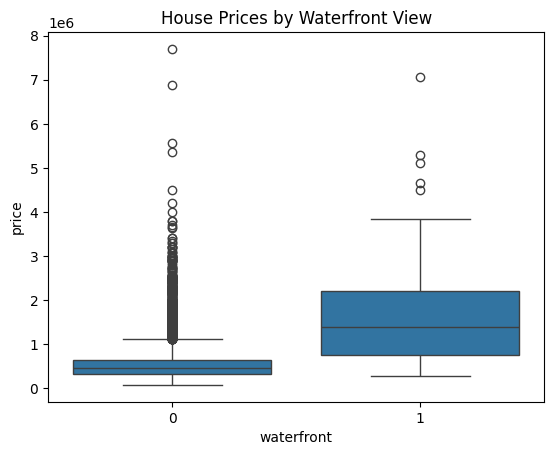

In [13]:
#Step 12:
# 12.1: Boxplot of price vs waterfront
sns.boxplot(x='waterfront', y='price', data=df)
#12.2: # Add title for clarity
plt.title("House Prices by Waterfront View")
plt.show()

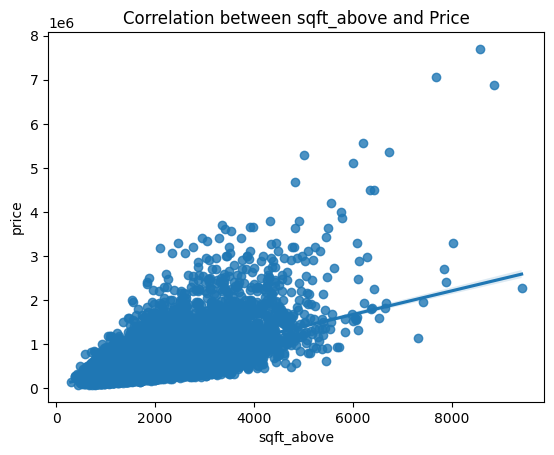

In [14]:
#Step 13:
#13.1: # Scatter plot with regression line
sns.regplot(x='sqft_above', y='price',data= df)
#13.2: Add title for clarity
plt.title("Correlation between sqft_above and Price")
plt.show()

In [15]:
#Step 14: Identifying Key Numerical Factors Affecting House Price
         # or Correlation of Numerical Features with House Price
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [16]:
#Model Development
#Step 15: Evaluating R² Score for Price Prediction Based on Longitude
# 15.1: Define feature (X) and target (Y)
X = df[['long']] # Feature: longitude of the house

Y = df['price'] #Target: house price

#15.2: Creating the Linear Regression Model
lm = LinearRegression()

#15.3: Fitting (Training) the Model
lm.fit(X,Y)

#15.4: Calculating the R² Score
r2=lm.score(X, Y)

# Display the R^2 value
print("R^2:", r2)


R^2: 0.00046769430149007363


In [17]:
#Step 16: Evaluating R² Score for Price Prediction Based on sqft_living
#16.1: Define feature (X) and target (Y)
X=df[['sqft_living']] # Feature: sqft_living of the house

Y=df['price']           # Target: house price

#16.2 Creating the Linear Regression Model
lm=LinearRegression()

#16.3: Fitting (Training) the Model
lm.fit(X,Y)

#16.4: Calculating the R² Score
r2=lm.score(X,Y)

# Display the R^2 value
print("R^2:", r2)


R^2: 0.4928532179037931


In [18]:
#Step 17:Multiple Linear Regression: Predicting House Price from Selected Features
#17.1: List of features
features=["floors", "waterfront", "lat", "bedrooms", 
            "sqft_basement", "view", "bathrooms", 
            "sqft_living15", "sqft_above", "grade", "sqft_living"]
#17.2: Define feature (X) and target (Y)
X=df[features] 
Y=df['price']

#17.3: Creating the Linear Regression Model
lm=LinearRegression()

#17.4: Fitting (Training) the Model
lm.fit(X,Y)

#17.5: Calculating the R² Score
r2=lm.score(X,Y)

# Display the R^2 value
print("R^2:", r2)



R^2: 0.6576890354915759


In [19]:
#Step 18: Polynomial Regression Pipeline for House Price Prediction and R² Evaluation
# 18.1: Create the list of steps for the pipeline
Input = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
]

# 18:2: Create the pipeline object
pipe = Pipeline(Input)

# 18.3: Define the features and target
features = ["floors", "waterfront", "lat", "bedrooms", 
            "sqft_basement", "view", "bathrooms", 
            "sqft_living15", "sqft_above", "grade", "sqft_living"]

X = df[features]
Y = df['price']

# 18:4: Fit the pipeline
pipe.fit(X, Y)

# 18:5: Calculate R^2
r2 = pipe.score(X, Y)

# 18:6: Display result
print("R^2:", r2)

R^2: 0.7512051345272872


In [20]:
#Step 19: Model Evaluation and Refinement
#19.1: Importing Functions for Model Evaluation and Data Splitting

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("Done")

#Preparing Dataset for Model Training and Evaluation (Train-Test Split with Sample Sizes)"
#19.2: Define the features and target
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    

X = df[features]
Y = df['price']

# 19.3:: Split Data into Training and Test Sets (85% Train, 15% Test)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

# 19.4: Display Number of Samples in Training and Test Sets
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


Done
number of test samples: 3242
number of training samples: 18371


In [21]:
#Step 20: Applying Ridge Regression to Predict House Prices and Evaluating R² on Test Data (α = 0.1)"
#20.1: Import Ridge Regression Module from scikit-learn
from sklearn.linear_model import Ridge

#20.2: Create Ridge regression model with alpha=0.1
ridge_model=Ridge(alpha=0.1)

#20.3: Fit the model using training data
ridge_model.fit(x_train,y_train)

#20.4: Calculate R² using test data
r2_ridge=ridge_model.score(x_test,y_test)

#Print the R² score
print("R² using Ridge Regression (alpha=0.1):", r2_ridge)


R² using Ridge Regression (alpha=0.1): 0.647875916393907


In [22]:
#Step 21: Polynomial Ridge Regression (Degree 2, α = 0.1) for House Price Prediction and R² Evaluation
#21.1: Importing Polynomial Feature Transformer and Ridge Regression Model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# 21.2: Create 2nd order polynomial transformer
poly = PolynomialFeatures(degree=2)

# 21.3: Transform training and testing features
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# 21.4: Create Ridge regression model
ridge_poly = Ridge(alpha=0.1)

# 21.5: Fit the model on transformed training data
ridge_poly.fit(x_train_poly, y_train)

# 21.6: Evaluate R² on transformed test data
r2_poly = ridge_poly.score(x_test_poly, y_test)

# 21.7: Print the R² score
print("R² using 2nd order Polynomial Ridge Regression (alpha=0.1):", r2_poly)


R² using 2nd order Polynomial Ridge Regression (alpha=0.1): 0.7002744263583341
